In [ ]:
# -*- coding: utf-8 -*-
import re
import numpy as np
import pandas as pd

In [ ]:
FILE_ID = "1bclX5PbqE8zR1-wOSM3ZTFa53sIC7RXqwty7Abmw9yQ"
GID = "1724592523"
csv_url = f"https://docs.google.com/spreadsheets/d/{FILE_ID}/export?format=csv&gid={GID}"

In [ ]:
df_raw = pd.read_csv(csv_url, dtype=str)
print("Перші рядки (raw):")
display(df_raw.head())

print("Початковий розмір (raw).shape:", df_raw.shape)

Перші рядки (raw):


,N,Посада,Мова програмування,Спеціалізація,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,...,Ще студент,Рівень англійської,Предметна область,Дата заповнення,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харків,до 10 осіб,...,TRUE,Pre-intermediate (нище середнього),"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,...,TRUE,Upper-Intermediate (вище середнього),Веб-розробка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0,0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Київ,до 1000 осіб,...,FALSE,Intermediate (середній),"Веб-розробка,Корпоративні системи",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4,1,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одеса,до 200 осіб,...,FALSE,Pre-intermediate (нище середнього),"Desktop Applications,Веб-розробка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5,4,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 і більше років,0.5,4500,500,Інше,до 10 осіб,...,FALSE,Intermediate (середній),"Desktop Applications,Веб-розробка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10,0.5,4500,NaN,DEV


Початковий розмір (raw).shape: (8704, 25)


In [ ]:
def normalize_col(c):
    c = str(c)
    c = c.replace("\n", " ")
    c = re.sub(r"\s+", " ", c)
    c = c.strip()

    c = c.replace(".", " ")
    c = re.sub(r"\s+", " ", c).strip()
    return c

df = df_raw.copy()
df.columns = [normalize_col(c) for c in df.columns]

print("\nКолонки після нормалізації:")
print(list(df.columns))


Колонки після нормалізації:
['N', 'Посада', 'Мова програмування', 'Спеціалізація', 'Загальний досвід роботи', 'Досвід роботи на поточному місці', 'Зарплата на місяць', 'Зміна зарплати за 12 місяців', 'Місто', 'Розмір компанії', 'Тип компанії', 'Стать', 'Вік', 'Освіта', 'Університет', 'Ще студент', 'Рівень англійської', 'Предметна область', 'Дата заповнення', 'User Agent', 'exp', 'current_job_exp', 'salary', 'Валюта', 'cls']


In [ ]:
def col_like(options, cols):
    """Повертає першу колонку з df.columns, яка дорівнює одному із варіантів options."""
    for o in options:
        if o in cols:
            return o
    raise KeyError(f"Не знайдено жодної з колонок: {options}")

col_posada = col_like(["Посада"], df.columns)
col_lang = col_like(["Мова програмування", "Мова програмуваня", "Мова програмуванння", "Мова програмуванния", "Мова програмування "], df.columns)
col_salary = col_like(["Зарплата на місяць", "Зарплата в місяць", "Зарплата на міcяць", "Зарплата"], df.columns)


print("\nhead():")
display(df.head())


head():


,N,Посада,Мова програмування,Спеціалізація,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,...,Ще студент,Рівень англійської,Предметна область,Дата заповнення,User Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харків,до 10 осіб,...,TRUE,Pre-intermediate (нище середнього),"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,...,TRUE,Upper-Intermediate (вище середнього),Веб-розробка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0,0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Київ,до 1000 осіб,...,FALSE,Intermediate (середній),"Веб-розробка,Корпоративні системи",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4,1,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одеса,до 200 осіб,...,FALSE,Pre-intermediate (нище середнього),"Desktop Applications,Веб-розробка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5,4,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 і більше років,0.5,4500,500,Інше,до 10 осіб,...,FALSE,Intermediate (середній),"Desktop Applications,Веб-розробка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10,0.5,4500,NaN,DEV


In [ ]:
print("\nshape:", df.shape)


shape: (8704, 25)


In [ ]:
print("\ndtypes (до конвертації):")
print(df.dtypes)



dtypes (до конвертації):
N                                   object
Посада                              object
Мова програмування                  object
Спеціалізація                       object
Загальний досвід роботи             object
Досвід роботи на поточному місці    object
Зарплата на місяць                  object
Зміна зарплати за 12 місяців        object
Місто                               object
Розмір компанії                     object
Тип компанії                        object
Стать                               object
Вік                                 object
Освіта                              object
Університет                         object
Ще студент                          object
Рівень англійської                  object
Предметна область                   object
Дата заповнення                     object
User Agent                          object
exp                                 object
current_job_exp                     object
salary                      

In [ ]:
null_share = df.isnull().mean().round(4)
print("\nЧастка пропусків (raw):")
display(null_share)


Частка пропусків (raw):


,0
N,0.0000
Посада,0.0000
Мова програмування,0.4423
Спеціалізація,0.8294
Загальний досвід роботи,0.0000
Досвід роботи на поточному місці,0.0000
Зарплата на місяць,0.0000
Зміна зарплати за 12 місяців,0.0000
Місто,0.0000
Розмір компанії,0.0000


In [ ]:
cols_with_na = df.columns[df.isnull().any()]
cols_to_drop = [c for c in cols_with_na if c != col_lang]
df_kept = df.drop(columns=cols_to_drop)
print("\nПісля видалення колонок з пропусками (крім 'Мова програмування') — shape:", df_kept.shape)


Після видалення колонок з пропусками (крім 'Мова програмування') — shape: (8704, 20)


In [ ]:
print("\nЧастка пропусків після відсікання колонок:")
display(df_kept.isnull().mean().round(4))


Частка пропусків після відсікання колонок:


,0
N,0.0000
Посада,0.0000
Мова програмування,0.4423
Загальний досвід роботи,0.0000
Досвід роботи на поточному місці,0.0000
Зарплата на місяць,0.0000
Зміна зарплати за 12 місяців,0.0000
Місто,0.0000
Розмір компанії,0.0000
Тип компанії,0.0000


In [ ]:
df_dropna = df.dropna(axis=0, how="any").copy()
print("\nПісля df.dropna() — новий розмір:", df_dropna.shape)


Після df.dropna() — новий розмір: (0, 25)


In [ ]:
def has_python(x):
    if pd.isna(x):
        return False
    return "python" in str(x).lower()

python_data = df[df[col_lang].apply(has_python)].copy()
print("\npython_data.shape:", python_data.shape)

# 12) Приводимо зарплату до numeric
def to_num(s):
    # приберемо все, що не цифра/крапка/кома, замінимо кому на крапку
    if pd.isna(s):
        return np.nan
    s = str(s)
    s = re.sub(r"[^\d,\.]", "", s).replace(",", ".")
    try:
        return float(s) if s else np.nan
    except:
        return np.nan

df[col_salary] = df[col_salary].apply(to_num)
python_data[col_salary] = python_data[col_salary].apply(to_num)


python_data.shape: (207, 25)


In [ ]:
salary_by_position = (
    df.groupby(col_posada, dropna=False)[col_salary]
      .agg(min_salary="min", max_salary="max")
      .reset_index()
)
print("\nМін/макс зарплата за Посадою:")
display(salary_by_position.head(10))


Мін/макс зарплата за Посадою:


,Посада,min_salary,max_salary
0,Business analyst,200.0,5000.0
1,DBA,380.0,6000.0
2,Data Scientist / Data Analyst,150.0,8000.0
3,Designer,100.0,4000.0
4,DevOps,194.0,10000.0
5,Director of Engineering / Program Director,1500.0,34000.0
6,ERP / CRM,100.0,6000.0
7,Game designer,150.0,6800.0
8,HR,100.0,7000.0
9,HTML coder,154.0,3000.0


In [ ]:
def fill_avg_salary(row):
    """Повертає середню зарплату в місяць по рядку.
    Якщо у  даних є окремі колонки 'Зарплата від'/'Зарплата до' — можна усереднювати їх."""
    return row[col_salary]

python_data["avg"] = python_data.apply(fill_avg_salary, axis=1)

print("\nОписова статистика для python_data['avg']:")
display(python_data["avg"].describe())


Описова статистика для python_data['avg']:


,avg
count,207.000000
mean,1753.937198
std,1314.751537
min,100.000000
25%,750.000000
50%,1425.000000
75%,2500.000000
max,9200.000000


In [ ]:
df.to_csv("2017_jun_final_normalized.csv", index=False, encoding="utf-8-sig")
df_dropna.to_csv("2017_jun_final_dropna.csv", index=False, encoding="utf-8-sig")
python_data.to_csv("python_data.csv", index=False, encoding="utf-8-sig")
salary_by_position.to_csv("salary_by_position.csv", index=False, encoding="utf-8-sig")

In [ ]:

print("\nГотово. Збережено файли:")
print(" - 2017_jun_final_normalized.csv")
print(" - 2017_jun_final_dropna.csv")
print(" - python_data.csv")
print(" - salary_by_position.csv")


Готово. Збережено файли:
 - 2017_jun_final_normalized.csv
 - 2017_jun_final_dropna.csv
 - python_data.csv
 - salary_by_position.csv


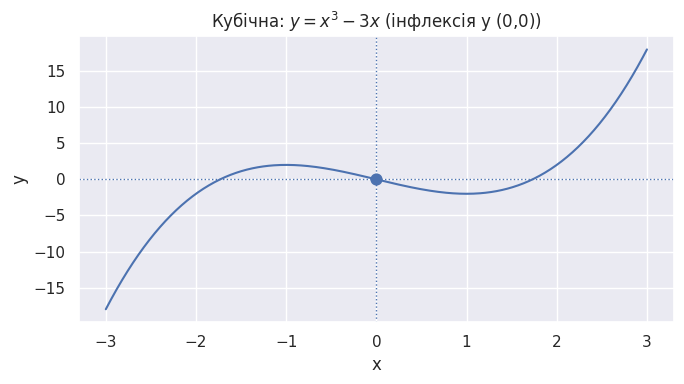

In [ ]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, seaborn as sns
plt.rcParams["font.family"] = "DejaVu Sans"
sns.set_theme(style="darkgrid")

# 1) Кубічна: y=x^3-3x (інфлексія)
x=np.linspace(-3,3,400); y=x**3-3*x
plt.figure(figsize=(7,4)); sns.lineplot(x=x,y=y)
plt.axhline(0,ls=":",lw=1); plt.axvline(0,ls=":",lw=1)
plt.scatter([0],[0],s=60); plt.title(r"Кубічна: $y=x^3-3x$ (інфлексія у (0,0))")
plt.xlabel("x"); plt.ylabel("y"); plt.tight_layout(); plt.show()

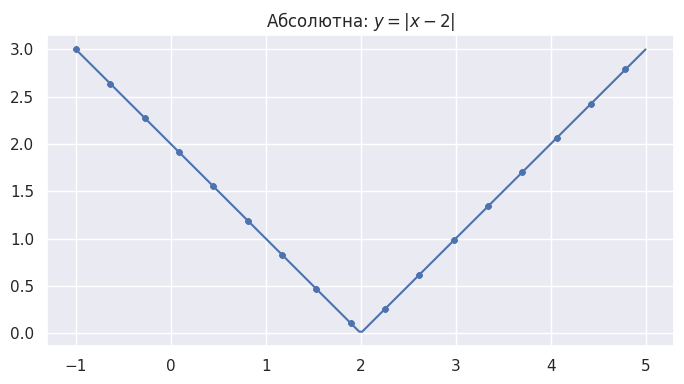

In [ ]:
x=np.linspace(-1,5,200); y=np.abs(x-2)
plt.figure(figsize=(7,4)); sns.lineplot(x=x,y=y)
sns.scatterplot(x=x[::12],y=y[::12],s=30)
plt.title(r"Абсолютна: $y=|x-2|$"); plt.tight_layout(); plt.show()


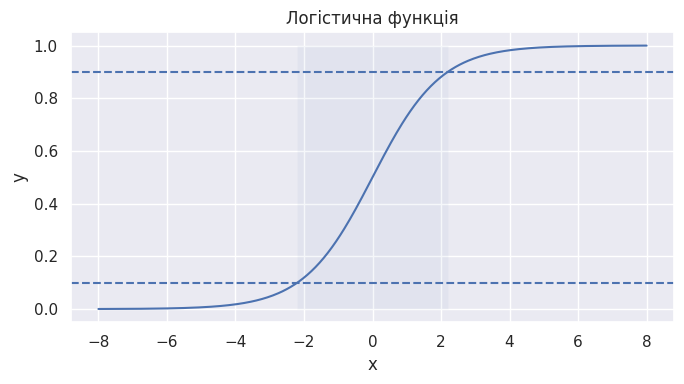

In [ ]:
x=np.linspace(-8,8,400); y=1/(1+np.exp(-x))
plt.figure(figsize=(7,4)); sns.lineplot(x=x,y=y)
plt.axhline(.1,ls="--"); plt.axhline(.9,ls="--"); plt.fill_between(x,(y>=.1)&(y<=.9),step="mid",alpha=.05)
plt.title("Логістична функція"); plt.xlabel("x"); plt.ylabel("y"); plt.tight_layout(); plt.show()

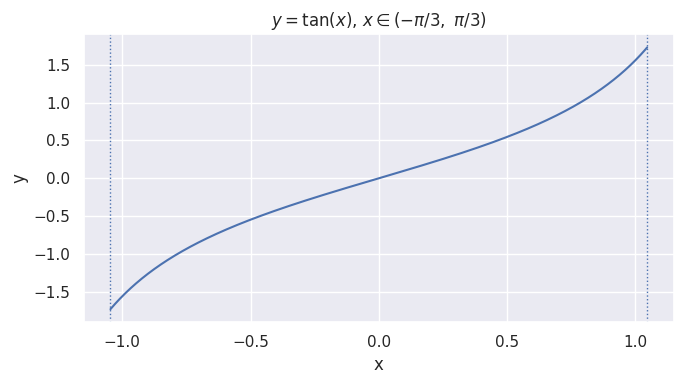

In [ ]:
L=np.pi/3; x=np.linspace(-L+.001,L-.001,800); y=np.tan(x)
plt.figure(figsize=(7,4)); sns.lineplot(x=x,y=y)
plt.axvline(-L,ls=":",lw=1); plt.axvline(L,ls=":",lw=1)
plt.title(r"$y=\tan(x)$, $x\in(-\pi/3,\ \pi/3)$"); plt.xlabel("x"); plt.ylabel("y")
plt.tight_layout(); plt.show()

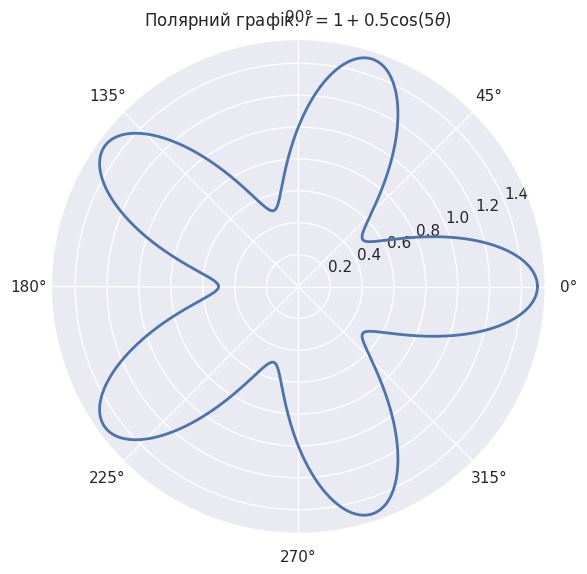

In [ ]:
theta=np.linspace(0,2*np.pi,800); r=1+0.5*np.cos(5*theta)
fig=plt.figure(figsize=(6,6)); ax=fig.add_subplot(111,projection="polar")
ax.plot(theta,r,lw=2); ax.set_title(r"Полярний графік: $r=1+0.5\cos(5\theta)$",va="bottom")
plt.tight_layout(); plt.show()